In [1]:
import pandas as pd 
import numpy as np 
import re 
from pathlib import Path 
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  


/var/folders/wc/dg5vr0h57jvg48dksgcxz02w0000gn/T/ipykernel_22230/151768480.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/processed/properties_cleaned.csv")
df.head(1)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,the lions cghs,flat,sector 56,1.99,11055.0,1800.09,Super Built up area 2400(222.97 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),4,4,3+,"pooja room,others",NaN,East,10+ Year Old,"['Sector 54 chowk metro station', 'Sector metro station', 'Sector metro station', 'Sector 53-54 metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Surgicare Hospital Gurgaon', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Heera Fuel Station', 'HCG CNG Station', '222', 'Hdfc bank and atm', 'Kotak mahindra bank', 'Axis bank', 'Indusind bank', 'State bank of india', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', ""Carl's Jr."", 'Starbucks', 'Cafe Tonini', 'Sagar Ratna', 'Shophouse by Kylin', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Rain Water Harvesting']"


AREAWITHTYPE COLUMN



In [3]:
df["areaWithType"].value_counts()

areaWithType
Plot area 360(301.01 sq.m.)                                                                                                     37
Plot area 300(250.84 sq.m.)                                                                                                     26
Plot area 502(419.74 sq.m.)                                                                                                     19
Plot area 200(167.23 sq.m.)                                                                                                     19
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)                                                   17
Super Built up area 1350(125.42 sq.m.)                                                                                          17
Plot area 270(225.75 sq.m.)                                                                                                     17
Super Built up area 1578(146.6 sq.m.)                                 

In [4]:
df[["area", "areaWithType"]].sample(5)

,area,areaWithType
3173,1950.11,Super Built up area 2215(205.78 sq.m.)Carpet area: 1950 sq.ft. (181.16 sq.m.)
2325,1650.05,Carpet area: 1650 (153.29 sq.m.)
1860,1300.05,Carpet area: 1300 (120.77 sq.m.)
2407,948.84,Super Built up area 990(91.97 sq.m.)
1157,1472.11,Super Built up area 1472(136.75 sq.m.)Built Up area: 1470 sq.ft. (136.57 sq.m.)Carpet area: 1251 sq.ft. (116.22 sq.m.)


Area with type contains three types Super builtup area, builtup area and carpet area. 

1. Super Builtup Area = This is the total area of a property including common areas such as corridors, lobby, staircase, elevator shafts,   etc., along with the individual area of the unit. Super built-up area often includes the proportionate share of amenities and facilities of the building complex as well. It's essentially the total constructed area of the property.

        Super Builtup Area = Built-up Area + Proportionate Share of Common Areas and Facilities

2. Builtup Area = This refers to the area that is enclosed by the walls of a property, including the thickness of the inner walls. It includes the carpet area (usable area) along with the thickness of the walls. In other words, it is the area that you "build up" when constructing the property. Built-up area excludes common areas.  

        Builtup Area = Carpet Area + Thickness of Inner Walls

3. This is the actual usable area within the walls of the property where you can place a carpet. It does not include the thickness of the inner walls. Carpet area represents the net usable area available to the occupants and excludes common areas, walls, balconies, etc. It's the area that you can physically use within your property.

        Carpet Area = Total Usable Area Within the Walls − Thickness of Inner Walls

In [5]:
# FUNCTION TO EXTRACT SUPER BUILTUP AREA
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [6]:
# FUNCTION TO EXTRACT BUILTUP AREA AND CARPET AREA
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# FUNCTION TO CONVERT UNIT OF MEASURSES INTO SQFT
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  
    return area_value


In [8]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [9]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3774,5.31,flat,4739.38,Super Built up area 4739(440.27 sq.m.)Built Up area: 3573.33 sq.ft. (331.97 sq.m.)Carpet area: 3400 sq.ft. (315.87 sq.m.),4739.0,3573.33,3400.0
1033,1.50,house,1735.71,Carpet area: 180 (150.5 sq.m.),NaN,NaN,180.0
1784,1.25,flat,1864.84,Super Built up area 1865(173.26 sq.m.),1865.0,NaN,NaN
1398,1.40,flat,1450.03,Super Built up area 1615(150.04 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),1615.0,1550.00,1450.0
2247,0.75,flat,1325.09,Super Built up area 1325(123.1 sq.m.),1325.0,NaN,NaN


In [10]:
df.shape

(3803, 20)

From the observation we see that from the three extracted columns, there is atleast one column which has missing values. So lets look for rows where all the three extracted columns have values.

In [11]:
df[~((df["super_built_up_area"].isnull()) | (df["built_up_area"].isnull()) | (df["carpet_area"].isnull()))][["property_type", "sector", "super_built_up_area", "built_up_area", "carpet_area"]].shape

(534, 5)

So we see that there are only 534 rows out of 3803 where none of the extracted columns are nulls.

In [12]:
df[["property_type", "areaWithType"]].sample(10)

,property_type,areaWithType
2826,flat,Super Built up area 2358(219.07 sq.m.)
2996,flat,Super Built up area 2997(278.43 sq.m.)
3622,house,Plot area 432(40.13 sq.m.)
1627,flat,Super Built up area 1260(117.06 sq.m.)
2156,flat,Super Built up area 2364(219.62 sq.m.)
3086,flat,Carpet area: 2785 (258.73 sq.m.)
3092,flat,Super Built up area 1748.87(162.48 sq.m.)Built Up area: 1471.12 sq.ft. (136.67 sq.m.)
2773,flat,Built Up area: 2631 (244.43 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.)
1215,flat,Super Built up area 3363(312.43 sq.m.)Carpet area: 2710 sq.ft. (251.77 sq.m.)
1500,flat,Super Built up area 1538(142.88 sq.m.)


Above we see that there are some rows which have Plot areas. So plot areas are associated with house and not flats. 

In [13]:
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum               2539
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

Now lets look at how many such rows exist where all there extracted columns have null values

In [14]:
df[((df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull()) & (df["carpet_area"].isnull()))][["property_type", "price"]].shape

(546, 2)

Out of total rows, 546 rows have all the three extracted column values as null

In [15]:
df_null = df[((df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull()) & (df["carpet_area"].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
df_null.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,5.90,house,2429.98,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
33,11.00,house,3095.98,Plot area 344(287.63 sq.m.),NaN,NaN,NaN
37,1.45,house,60.00,Plot area 60(5.57 sq.m.),NaN,NaN,NaN
43,3.50,house,1448.98,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
55,10.85,house,2844.04,Plot area 316(264.22 sq.m.),NaN,NaN,NaN


So we see that all the rows which have all the three extracted columns as nulls have propert type as house. That makes sense because super builtup area, builtup area and carpet area are the attributes associated only with flats. The houses (bungalows) have plot area attribute assicated with them.

Now from google I understood that the the plot area associated with houses is very similar to a built up area. We can thus use the plot area to populate the null values of built up area due to their similarity.

In [16]:
# FUNCTION TO EXTRACT PLOT AREA
def extract_plot_area(value):
    match = re.search(r'Plot area (\d+\.?\d*)', value)
    return float(match.group(1))

In [17]:
df_null["built_up_area"] = df_null["areaWithType"].apply(extract_plot_area)
df_null.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,5.90,house,2429.98,Plot area 270(225.75 sq.m.),NaN,270.0,NaN
33,11.00,house,3095.98,Plot area 344(287.63 sq.m.),NaN,344.0,NaN
37,1.45,house,60.00,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
43,3.50,house,1448.98,Plot area 161(134.62 sq.m.),NaN,161.0,NaN
55,10.85,house,2844.04,Plot area 316(264.22 sq.m.),NaN,316.0,NaN


In [18]:
def unit_conversion(value):
    if np.isnan(value["area"]) or np.isnan(value["built_up_area"]):
        return value["built_up_area"]
    else:
        if round(value["area"]/value["built_up_area"],2) == 9:
            return value["built_up_area"] * 9
        elif round(value["area"]/value["built_up_area"],2) == 11:
            return value["built_up_area"] * 10.7
        elif round(value["area"]/value["built_up_area"],2) == 1:
            return value["built_up_area"] 

In [19]:
df_null["built_up_area"] = df_null.apply(unit_conversion, axis=1)
df_null.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,5.90,house,2429.98,Plot area 270(225.75 sq.m.),NaN,2430.0,NaN
33,11.00,house,3095.98,Plot area 344(287.63 sq.m.),NaN,3096.0,NaN
37,1.45,house,60.00,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
43,3.50,house,1448.98,Plot area 161(134.62 sq.m.),NaN,1449.0,NaN
55,10.85,house,2844.04,Plot area 316(264.22 sq.m.),NaN,2844.0,NaN


In [20]:
df_null.columns

Index(['price', 'property_type', 'area', 'areaWithType', 'super_built_up_area',
       'built_up_area', 'carpet_area'],
      dtype='object')

In [21]:
df.columns

Index(['society', 'property_type', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area'],
      dtype='object')

In [22]:
df.update(df_null)

In [23]:
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum               2539
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2119
carpet_area            1859
dtype: int64

ADDITIONAL ROOM COLUMN

In [24]:
df["additionalRoom"].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [25]:
# THERE ARE 4 CATEGORIES SO LETS SEPERTE THESE 4 CATEGORIES IN 4 SEPERATE COLUMNS
columns = ["servant room", "pooja room", "store room", "study room", "others"] 

for col in columns:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [26]:
df.sample(5)[["additionalRoom", "servant room", "pooja room", "store room", "study room", "others"]]

,additionalRoom,servant room,pooja room,store room,study room,others
356,"store room,pooja room,servant room,study room",1,1,1,1,0
1963,not available,0,0,0,0,0
1652,not available,0,0,0,0,0
2184,"pooja room,study room,servant room,others",1,1,0,1,1
2852,servant room,1,0,0,0,0


In [27]:
df.shape

(3803, 25)

AGE POSSESSION COLUMN

In [28]:
df["agePossession"].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Aug-23                   7
Oct-24                   7
Jan-24                   7
Dec-25                   7
Nov-23                   5
Jun-24                   5
Sep-23                   4
Jul-24                   4
Aug-24                   4
By 2025                  4
Feb-24                   3
May-24                   3
Oct-23                   3
Jan-25                   3
Nov-24                   3
Dec-26                   2
Jun 2024                 2
Oct-25                   2
Jan-26                   2
Aug-25                   2
Jul-27                   2
Sep-25                   2
Apr-26                   2
Jun-27        

In [29]:
# CATEGORISING THE PROPERTY AGE WISE
def categorisation(value):
    if pd.isna(value):
        return "undefined"
    elif "0 to 1 Year Old" in value or "Within 3 months" in value or "Within 6 months" in value:
        return "new property"
    elif "1 to 5 Year Old" in value:
        return "relatively new"
    elif "5 to 10 Year Old" in value:
        return "moderately new"
    elif "10+ Year Old" in value:
        return "old property"
    elif "Under Construction" in value or "By" in value:
        return "under construction"
    
    try:
        int(value.split(" ")[-1])
        return "under construction"
    except:
        return "Undefined"

In [30]:
df["agePossession"] = df["agePossession"].apply(categorisation)
df.sample(10)[["property_type", "price", "agePossession"]]

,property_type,price,agePossession
1719,flat,1.00,new property
3375,flat,1.90,new property
816,flat,4.20,Undefined
1358,flat,1.70,moderately new
3597,flat,0.88,Undefined
20,flat,0.98,moderately new
3115,flat,1.78,moderately new
3201,flat,1.55,relatively new
3284,flat,1.32,relatively new
3202,house,0.80,moderately new


In [31]:
df["agePossession"].value_counts()

agePossession
relatively new        1676
new property           626
moderately new         575
Undefined              475
old property           310
under construction     140
undefined                1
Name: count, dtype: int64

FURNISH DETAIL COLUMN

In [32]:
df[["furnishDetails"]].sample(5)

,furnishDetails
3751,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']"
1523,"['1 Fan', '1 Geyser', '1 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']"
910,"['1 Wardrobe', '1 Fan', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"
767,"['3 Wardrobe', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"
1359,NaN


In [33]:
print(f"Total null values are {df['furnishDetails'].isnull().sum()}")

Total null values are 981


In [34]:
df[["features"]].sample(5)

,features
1361,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting', 'Water softening plant']"
239,NaN
1372,['Water Storage']
940,"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2576,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [35]:
print(f"Total null values are {df['features'].isnull().sum()}")

Total null values are 635


In [36]:
# EXTRACTING UNIQUE DETAILS FROM FURNISHING DETAILS COLUMN
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [37]:
furnishings_df.shape

(3803, 19)

In [38]:
furnishings_df.drop(columns="furnishDetails", inplace=True)

In [39]:
furnishings_df.sample(5)

,Modular Kitchen,Dining Table,Exhaust Fan,Water Purifier,Stove,Wardrobe,Chimney,Fan,AC,Fridge,Bed,Microwave,TV,Sofa,Washing Machine,Curtains,Geyser,Light
1912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1769,1,0,0,0,0,0,1,6,4,0,0,0,0,0,0,0,0,6
3674,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3442,1,0,0,1,1,0,1,0,8,0,0,0,0,0,0,0,11,8


Here we will do clustering just to identify how many different clusters can be formed for the different furnishing details based on their similarity. We will use KMeans clustering and Elbow method to identify the right number of clusters

In [40]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.set_output(transform="pandas")
scaled_df = scaler.fit_transform(furnishings_df)

scaled_df.sample(5)

,Modular Kitchen,Dining Table,Exhaust Fan,Water Purifier,Stove,Wardrobe,Chimney,Fan,AC,Fridge,Bed,Microwave,TV,Sofa,Washing Machine,Curtains,Geyser,Light
2684,-0.817750,-0.192581,-0.699312,-0.330746,-0.381873,-0.536148,-0.529455,-0.638432,-0.529074,-0.236225,-0.118912,-0.241354,-0.11657,-0.204738,-0.218308,-0.225953,-0.508191,-0.487417
3436,1.222868,-0.192581,1.429978,-0.330746,-0.381873,0.989172,1.038705,0.454996,-0.156193,-0.236225,-0.118912,-0.241354,-0.11657,-0.204738,-0.218308,-0.225953,1.268958,0.717634
3555,1.222868,-0.192581,-0.699312,-0.330746,-0.381873,0.607842,1.038705,0.728353,-0.529074,-0.236225,-0.118912,-0.241354,-0.11657,-0.204738,-0.218308,-0.225953,0.380384,-0.023936
1669,-0.817750,-0.192581,-0.699312,-0.330746,-0.381873,-0.536148,-0.529455,-0.638432,-0.529074,-0.236225,-0.118912,-0.241354,-0.11657,-0.204738,-0.218308,-0.225953,-0.508191,-0.487417
919,1.222868,-0.192581,1.429978,-0.330746,2.618671,0.226512,1.038705,0.728353,0.589570,-0.236225,-0.118912,-0.241354,-0.11657,-0.204738,-0.218308,0.532475,0.380384,0.439545


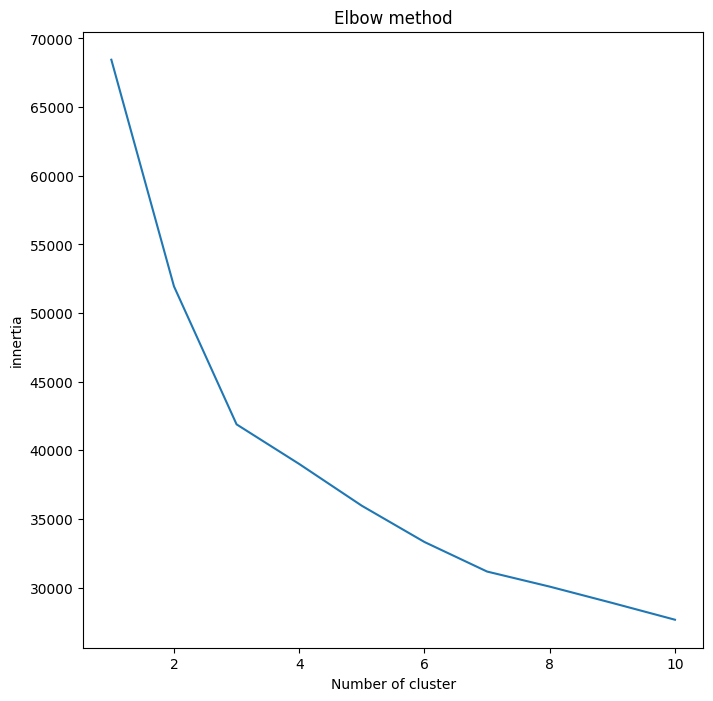

In [41]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, random_state= 42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
    

plt.figure(figsize=(8,8))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of cluster")
plt.ylabel("innertia")
plt.title("Elbow method")
plt.show()

So the elbow method suggests 3 clusters are the ideal number of clusters to divide our data. Now lets do clustering with 3 clusters.

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df)
labels = kmeans.predict(scaled_df)

In [43]:
df = df.iloc[:,:-18]

In [44]:
df["furniture_labels"] = labels

In [45]:
df.sample(5)[["furnishDetails", "furniture_labels"]]

,furnishDetails,furniture_labels
1920,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
475,"['5 Fan', '1 Exhaust Fan', '1 Geyser', '5 Light', '4 AC', '1 Curtains', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1274,"['13 Fan', '7 Geyser', '7 Light', '2 Chimney', '7 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
1080,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3624,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0


In [46]:
df["furniture_labels"].value_counts()

furniture_labels
0    2534
2    1057
1     212
Name: count, dtype: int64

In [47]:
df[df["furniture_labels"]==1]["furnishDetails"].sample(1)

2198    ['7 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '6 Light', '1 Chimney', '1 Modular Kitchen', '5 AC', '3 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']
Name: furnishDetails, dtype: object

In [48]:
df[df["furniture_labels"]==2]["furnishDetails"].sample(1)

1785    ['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '9 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']
Name: furnishDetails, dtype: object

In [49]:
df[df["furniture_labels"]==0]["furnishDetails"].sample(1)

1923    []
Name: furnishDetails, dtype: object

Label 1 - Furnished
Label 2 - Semi furnished
Label 3 - Unfurnished

FEATURES COLUMN -  This column give sinformation of all the ammenities and features available in a society.

In [50]:
df[["society", "features"]].sample(5)

,society,features
2307,experion windchants,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
96,eldeco accolade,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
193,ireo victory valley,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1418,aipl the peaceful homes,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2189,hcbs sports ville,"['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Rain Water Harvesting', 'Club house / Community Center']"


In [51]:
df["features"].isnull().sum()

635

In [52]:
null_temp = df[df["features"].isnull()]
null_temp.head()

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels
15,assotech blith,flat,sector 99,1.90,6702.0,2834.97,Built Up area: 2835 (263.38 sq.m.),4,4,3+,not available,2.0,North-East,Undefined,"['Huda Metro Station (Gurugram)', 'Dwarka Expressway', 'Gurugram Global Heights School', 'DPG Institute of Technology', 'Signature Advanced Hospital', 'Indira Gandhi International Airport', 'iON Digital Zone, Gurgaon', 'IMT Manesar', 'Holiday Inn Gurugram Sector 90', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2835.0,NaN,0,0,0,0,0,0
16,unitech sunbreeze,flat,sector 69,1.00,5476.0,1826.15,Built Up area: 1826 (169.64 sq.m.),4,3,No,not available,NaN,NaN,Undefined,NaN,NaN,NaN,NaN,1826.0,NaN,0,0,0,0,0,0
18,whiteland the aspen,flat,sector 76,3.50,11917.0,2936.98,Built Up area: 2937 (272.86 sq.m.)Carpet area: 1762 sq.ft. (163.7 sq.m.),3,4,3,not available,NaN,NaN,Undefined,"['S.R.S. Hospital and Critical Care Unit', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump Indian Oil', 'Petrol Pump IBP', 'Haldiram']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,2937.0,1762.0,0,0,0,0,0,0
26,mrg skyline,flat,sector 106,1.82,13392.0,1359.02,Built Up area: 1359 (126.26 sq.m.)Carpet area: 952 sq.ft. (88.44 sq.m.),3,2,2,not available,NaN,East,Undefined,"['Chintapurni Mandir', 'State bank ATM', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Bhardwaj Hospital', 'Dr. Hitesh Dawar', 'Kalyan Hospital Gurgaon', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', 'Prateek Nursing Home And Polyclinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Kr Dental Hub', 'Shree Krishna Hospital Gurgaon', 'Sarvodya Hospital', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1359.0,952.0,0,0,0,0,0,0
36,signature global orchard avenue,flat,sector 93,0.40,5479.0,730.06,Built Up area: 730 (67.82 sq.m.),2,2,No,not available,NaN,NaN,Undefined,"['JMS Crosswalk Mall', 'Reliance Trends Newtown Square Mall', 'Pataudi Rd, Gurugram', 'RPS International School', 'Euro Intl School, Sector 84, Gurugram', 'SGT University', 'Aarvy Healthcare Super Speciality', 'Indira Gandhi International Airport']",NaN,NaN,NaN,730.0,NaN,0,0,0,0,0,0


In [53]:
null_temp.shape

(635, 26)

We can use our apartments.csv file from our data to fill these null values as the that file also has similar columns. The column features exist in that file too.

In [54]:
df2 = pd.read_csv("/Users/siddhant/housepriceproject/Capstone/data/raw/appartments.csv")
df2.sample(5)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon","['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']","{'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}",https://www.99acres.com/adani-brahma-samsara-vilasa-sector-63-gurgaon-npxid-r327995,"{'3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,800 - 3,150 sq.ft.', 'price-range': '₹ 2.43 - 15.75 Cr'}, '4 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '2,750 - 4,500 sq.ft.', 'price-range': '₹ 3.36 - 22.5 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '500 - 4,329 sq.ft.', 'price-range': '₹ 2.05 - 41.13 Cr'}}","['Terrace Garden', 'Gazebo', 'Fountain', 'Amphitheatre', 'Party Lawn', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Indoor Games']"
194,Pyramid Spring Valley,"Land in Sohna, Gurgaon","['Sohna Road', 'GD Goenka High School', 'Vardaan Hospital', 'Sohna Bus Stand', 'K.R. Mangalam University']","{'Sohna Road': '0.1 Km', 'GD Goenka High School': '1.3 Km', 'Vardaan Hospital': '3.7 Km', 'Sohna Bus Stand': '3.7 Km', 'K.R. Mangalam University': '4.4 Km', 'Country Inn & Suites By Radisson': '9.1 Km', 'Damdama Lake': '10.5 Km', 'Western Peripheral Expressway': '11.8 Km', 'Airia Mall': '12 Km', 'Indira Gandhi International Airport': '35.8 Km'}",https://www.99acres.com/pyramid-spring-valley-sohna-gurgaon-npxid-r338595,"{'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '936 sq.ft.', 'price-range': 'Price on Request'}}","['Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Jogging Track', 'Rain Water Harvesting', '24/7 Power Backup', 'Landscape Garden', ""Children's Play Area"", 'Lift(s)']"
204,Signature Global Solera 2,"1, 2 BHK Apartment in Sector 107, Gurgaon","['Dwarka Expressway', 'IGI Airport', 'Delhi']","{'Dwarka Expressway': '2 Minutes', 'IGI Airport': '10 Minutes', 'Delhi': '5 Minutes'}",https://www.99acres.com/signature-global-solera-2-sector-107-gurgaon-npxid-r276621,"{'1 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '338.64 sq.ft.', 'price-range': '₹ 16.56 L'}, '2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '514.4 - 577.95 sq.ft.', 'price-range': '₹ 25.19 - 28.32 L'}}","['Pergola', 'Creche/Day care', 'Amphitheatre', 'Community Hall', 'Badminton Court', 'Jogging Track', '24x7 Security', 'Club House', '24/7 Power Backup']"
241,Suncity Avenue 102,"2 BHK Apartment in Sector 102, Gurgaon","['Delhi International Airport', 'AIIMS', 'The Hive', 'Gurugram Rd', 'JMS Marine Square']","{'Delhi International Airport': '34 minutes drive', 'AIIMS': '26 minutes drive', 'The Hive': '5 minutes drive', 'Gurugram Rd': 'In close proximity', 'JMS Marine Square': '8 minutes drive', 'Stymerra Chowk': '8 minutes drive', 'Sector 102 Dhankot': '5 minutes drive', 'Shri Hanuman Ji Mandir': '5 minutes drive', 'MCC Cricket Ground Dhankot': '6 minutes drive', 'KFG Sports Club': '8 minutes drive', 'Signature Hospital': '10 minutes drive', 'Prime Scholars Int. School': 'In close proximity'}",https://www.99acres.com/suncity-avenue-102-sector-102-gurgaon-npxid-r256209,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '605.5 - 632 sq.ft.', 'price-range': 'Price on Request'}}","['

We can use the top facilities column from this file to fill the missing values in our features column

In [55]:
df2["PropertyName"] = df2["PropertyName"].str.lower()

In [56]:
df2.shape

(247, 7)

In [57]:
# MERGING NULL_DF AND DF2 AND EXTRACTING THE VALUE OF TOP FACILITY COLUMN FROM THIS MERGE
x = null_temp.merge(df2, left_on="society", right_on="PropertyName", how="left")["TopFacilities"]

In [58]:
x.shape

(635,)

In [59]:
# REPLACING THE NULL VALUES IN FEATURES COLUMN WITH THE VALUES GRABBED FROM TOP FACILITIES COLUMN
df.loc[null_temp.index, "features"] = x.values

In [60]:
df["features"].isnull().sum()

481

We were able to impute many null values by using values from the Top facilities column in apartments.csv

In [61]:
import ast

df["features"] = df["features"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

features_df = pd.DataFrame()
unique_features = set()

for row in df["features"]:
    unique_features.update(row)

unique_features = [item.replace('/',"").replace('\\',"").strip() for item in unique_features]

for feature in unique_features:
    features_df[feature] = df["features"].apply(lambda x: 1 if feature in x else 0)

features_df.head()

,Natural Pond,Aerobics Centre,Solar Water Heating,Medical Centre,Power Back-up,ATM,Card Room,RO System,Doctor on Call,Lift(s),Lounge,Jogging Track,Restaurant,Theatre,Clinic,247 Power Backup,Billiards,Terrace Garden,Pool Table,Maintenance Staff,Conference room,Low Density Society,Separate entry for servant room,Golf Course,No open drainage around,Video Door Security,Water Softener Plant,Security Personnel,Entrance Lobby,Internetwi-fi connectivity,Business Lounge,Car wash area,BarChill-Out Lounge,Park,YogaMeditation Area,Fitness Centre GYM,Bus Shelter,Manicured Garden,Toddler Pool,Landscape Garden,Squash Court,Children's Play Area,Football,Jacuzzi,Reading Lounge,Gated Community,CrecheDay care,Cricket Pitch,Water purifier,Centrally Air Conditioned,Badminton Court,High Ceiling Height,24x7 Security,Earthquake Resistant,Banquet Hall,Power Back up Lift,Grocery Shop,Spa,Lawn Tennis Court,Gymnasium,Solar Lighting,Automated Car Wash,Club House,Waiting Lounge,Natural Light,Cigar Lounge,Property Staff,Car Parking,Community Hall,Air Hockey,Salon,247 Water Supply,Sewage Treatment Plant,Feng Shui Vaastu Compliant,Gazebo,Foosball,Waste Disposal,Flower Garden,Sun Deck,Beach Volley Ball Court,Volley Ball Court,Piped Gas,Infinity Pool,Skating Rink,Sauna,Multipurpose Hall,Visitor Parking,Club house Community Center,Rain Water Harvesting,Pergola,Barbecue,Shopping Centre,Vastu Compliant,Party Lawn,Fountain,Security Fire Alarm,Water Storage,Amphitheatre,False Ceiling Lighting,School,Valet Parking,Visitors Parking,Bowling Alley,Private Garden Terrace,Concierge Service,Temple,Library,Milk Booth,Intercom Facility,Steam Room,Cafeteria,Internal Street Lights,Basketball Court,Fire Fighting Systems,Airy Rooms,Piped-gas,Bank Attached Property,CCTV Camera Security,Food Court,Mini Theatre,Swimming Pool,High Speed Elevators,Reflexology Park,Wi-Fi Connectivity,Recently Renovated,Spacious Interiors,Water softening plant,Laundry,Multipurpose Court,Changing Area
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


From a SME we got information on general points that are given to each feature in the Real Estate Domain depicting the level of luxury

In [65]:
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
     'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [66]:
def cal_feature_score(row):
    score = 0
    for feature, feature_score in weights.items():
        if row.get(feature, 0) == 1:
            score += feature_score
    return score

features_df["luxury_score"] = features_df.apply(cal_feature_score, axis=1)

In [67]:
features_df.head()

,Natural Pond,Aerobics Centre,Solar Water Heating,Medical Centre,Power Back-up,ATM,Card Room,RO System,Doctor on Call,Lift(s),Lounge,Jogging Track,Restaurant,Theatre,Clinic,247 Power Backup,Billiards,Terrace Garden,Pool Table,Maintenance Staff,Conference room,Low Density Society,Separate entry for servant room,Golf Course,No open drainage around,Video Door Security,Water Softener Plant,Security Personnel,Entrance Lobby,Internetwi-fi connectivity,Business Lounge,Car wash area,BarChill-Out Lounge,Park,YogaMeditation Area,Fitness Centre GYM,Bus Shelter,Manicured Garden,Toddler Pool,Landscape Garden,Squash Court,Children's Play Area,Football,Jacuzzi,Reading Lounge,Gated Community,CrecheDay care,Cricket Pitch,Water purifier,Centrally Air Conditioned,Badminton Court,High Ceiling Height,24x7 Security,Earthquake Resistant,Banquet Hall,Power Back up Lift,Grocery Shop,Spa,Lawn Tennis Court,Gymnasium,Solar Lighting,Automated Car Wash,Club House,Waiting Lounge,Natural Light,Cigar Lounge,Property Staff,Car Parking,Community Hall,Air Hockey,Salon,247 Water Supply,Sewage Treatment Plant,Feng Shui Vaastu Compliant,Gazebo,Foosball,Waste Disposal,Flower Garden,Sun Deck,Beach Volley Ball Court,Volley Ball Court,Piped Gas,Infinity Pool,Skating Rink,Sauna,Multipurpose Hall,Visitor Parking,Club house Community Center,Rain Water Harvesting,Pergola,Barbecue,Shopping Centre,Vastu Compliant,Party Lawn,Fountain,Security Fire Alarm,Water Storage,Amphitheatre,False Ceiling Lighting,School,Valet Parking,Visitors Parking,Bowling Alley,Private Garden Terrace,Concierge Service,Temple,Library,Milk Booth,Intercom Facility,Steam Room,Cafeteria,Internal Street Lights,Basketball Court,Fire Fighting Systems,Airy Rooms,Piped-gas,Bank Attached Property,CCTV Camera Security,Food Court,Mini Theatre,Swimming Pool,High Speed Elevators,Reflexology Park,Wi-Fi Connectivity,Recently Renovated,Spacious Interiors,Water softening plant,Laundry,Multipurpose Court,Changing Area,luxury_score
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,92
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,75
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,120
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,81


In [68]:
df["luxury_score"] = features_df["luxury_score"]
df.head()[["features", "luxury_score"]]

,features,luxury_score
0,"[Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Fitness Centre / GYM, Rain Water Harvesting]",92
1,"[Security / Fire Alarm, Power Back-up, Lift(s), Maintenance Staff, Water Storage, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",75
2,"[Water purifier, Security / Fire Alarm, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",120
3,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",35
4,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Visitor Parking, Swimming Pool, Park, Security Personnel, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",81


In [70]:
df.drop(columns=["additionalRoom", "nearbyLocations", "furnishDetails", "features"], inplace=True)
df.sample(5)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furniture_labels,luxury_score
474,bptp astaire gardens,flat,sector 70a,1.20,7058.0,1700.20,Super Built up area 1700(157.94 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.),3,3,3+,2.0,NaN,relatively new,1700.0,1450.0,NaN,0,0,0,0,0,1,23
1546,independent,house,sector 55,7.49,27741.0,2699.97,Plot area 300(250.84 sq.m.),12,12,3+,4.0,South-East,relatively new,NaN,2700.0,NaN,1,1,0,1,0,2,35
2498,independent,house,sector 40,9.50,40135.0,2367.01,Plot area 263(219.9 sq.m.),12,12,3+,4.0,NaN,new property,NaN,2367.0,NaN,0,0,1,0,0,2,36
1554,citizen apartment,flat,sector 51,3.55,6826.0,5200.70,Built Up area: 5200 (483.1 sq.m.)Carpet area: 4700 sq.ft. (436.64 sq.m.),5,6,3+,NaN,North,moderately new,NaN,5200.0,4700.0,1,1,1,1,0,2,119
736,greenopolis,flat,sector 89,0.80,6168.0,1297.02,Carpet area: 1297 (120.5 sq.m.),2,2,2,NaN,South,under construction,NaN,NaN,1297.0,0,0,0,0,0,0,35


In [71]:
df.shape

(3803, 23)

In [72]:
from pathlib import Path 

curr_dir = Path("/Users/siddhant/housepriceproject/Capstone/notebooks/feature-engineering.ipynb")
home_dir = curr_dir.parent.parent.parent
destination_dir = home_dir / 'Capstone' / 'data' / 'processed'

destination_dir.mkdir(parents=True, exist_ok=True)

filename = "properties_cleaned_V2.csv"
filepath = destination_dir / filename

df.to_csv(filepath, index=False)